In [1]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import seaborn as sns 
import transport.magconfig as magconfig
import transport.band_model as band_model

sns.set_context("talk")


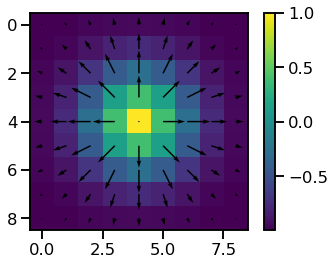

In [2]:
# test 9 x 9 skyrmion
Lx =  Ly = 9
Lz = 1
xs, ys, zs = magconfig.make_lattice(Lx, Ly, Lz)
mx, my, mz = magconfig.make_skyrmion(xs, ys, zs,0.2)

plt.quiver(mx.reshape(Lx,Ly), my.reshape(Lx,Ly))
plt.imshow(mz.reshape(Lx,Ly))
plt.colorbar()


In [3]:
# test the model
mconfig = np.vstack([mx, my, mz])
mconfig = mconfig.reshape(3, Lx, Ly, Lz)
model = band_model.ElectronMagModel(mconfig, 0.0, 10.0, 0.0)

In [4]:
# test Hamiltonian generating
model.Hamiltonian(0,0,0).shape

(162, 162)

In [5]:
from tqdm.notebook import tqdm
kxs, kys, kzs = model.getks(100,100,1)
solver = band_model.BandSolver(model)
res = solver.solvebands(kxs, kys, kzs, statusbar=tqdm)

Text(0, 0.5, '$\\sigma_{xy}$')

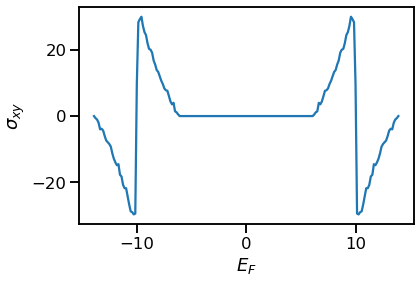

In [6]:

es = res["energy"]
s = []
Efs = np.linspace(es.min(),es.max(),200)
for Ef in Efs:
    s.append(res["sigmaxy"][es < Ef ].sum())
plt.plot(Efs,s)
plt.xlabel(r"$E_F$")
plt.ylabel(r"$\sigma_{xy}$")

In [7]:
# compare it with magnetic field
Lx =  Ly = 9
Lz = 1
xs, ys, zs = magconfig.make_lattice(Lx, Ly, Lz)
mx, my, mz = magconfig.make_para(xs, ys, zs)

In [8]:
# test the model
mconfig = np.vstack([mx, my, mz])
mconfig = mconfig.reshape(3, Lx, Ly, Lz)
model = band_model.ElectronMagModel(mconfig, 0.0, 10.0, 2.0*np.pi/9/9)

In [9]:
# test Hamiltonian generating
model.Hamiltonian(0,0,0).shape

(162, 162)

In [10]:
from tqdm.notebook import tqdm
kxs, kys, kzs = model.getks(100,100,1)
solver = band_model.BandSolver(model)
res = solver.solvebands(kxs, kys, kzs, statusbar=tqdm)

Text(0, 0.5, '$\\sigma_{xy}$')

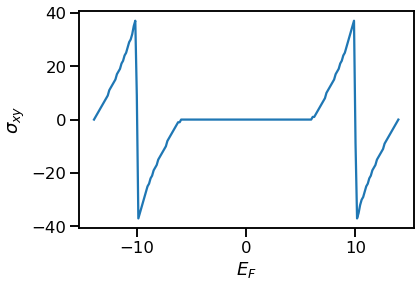

In [11]:

es = res["energy"]
s = []
Efs = np.linspace(es.min(),es.max(),200)
for Ef in Efs:
    s.append(res["sigmaxy"][ es < Ef ].sum())
plt.plot(Efs,s)
plt.xlabel(r"$E_F$")
plt.ylabel(r"$\sigma_{xy}$")

